In [34]:
from math import sin, cos, log, ceil 
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [35]:
g = 9.8
v_t = 30.0
C_D = 1/40
C_L = 1

v0 = v_t
theta0 = 0
x0 = 0
y0 =1000

In [36]:
def f(u):
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                        -g*cos(theta)/v +g/v_t**2*v,
                        v*cos(theta),
                        v*sin(theta)])

In [37]:
def euler_step(u, f, dt):
    return u +dt *f(u)

In [38]:
T = 100.
dt = 0.1
N = int(T/dt)+1
t = numpy.linspace(0,T,N)

u = numpy.empty((N,4))
u[0] = numpy.array([v0,theta0,x0,y0])

for n in range(N-1):
    u[n+1]=euler_step(u[n],f,dt)

In [55]:
# get the glider's position with respect to the time
x = u[:,2]
y = u[:,3]

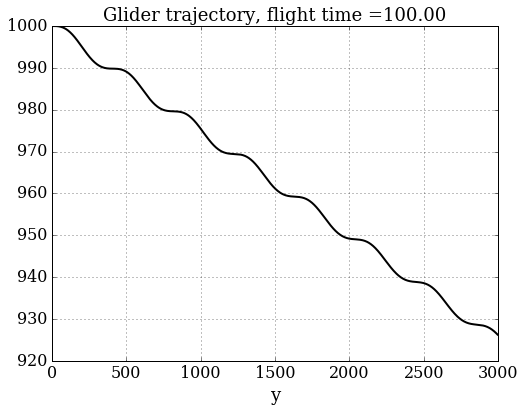

In [52]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x',fontsize=18)
pyplot.xlabel(r'y',fontsize=18)
pyplot.title('Glider trajectory, flight time =%.2f' %T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2)